#### Decision Tree Classifier Implementation


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from sklearn.datasets import load_iris

In [109]:
iris = load_iris()

In [110]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [111]:
X= pd.DataFrame(iris['data'])

In [112]:
y = pd.DataFrame(iris['target'])

In [113]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
treeClass = DecisionTreeClassifier()

In [118]:
treeClass.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
y_pred = treeClass.predict(X_test)

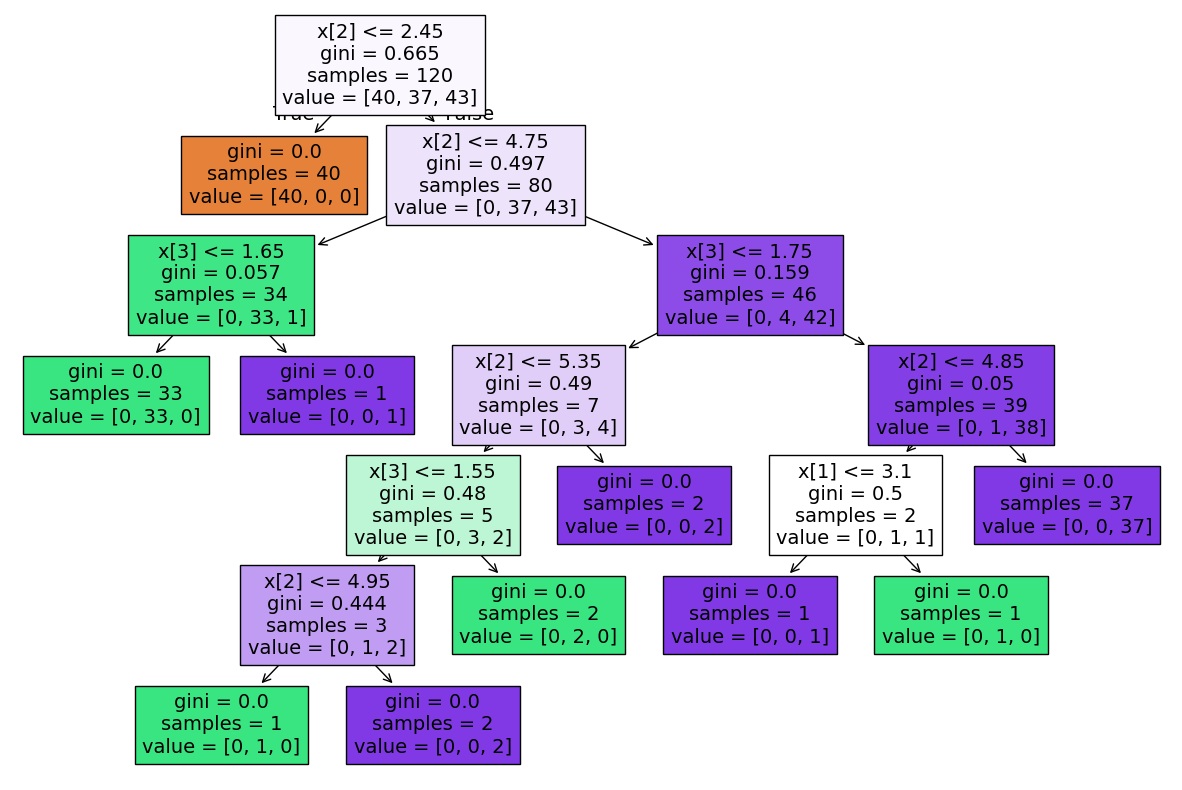

In [120]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeClass,filled=True)
plt.show()

In [121]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### HyperParameter Tunning and PrePrunning

In [122]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # All supported criteria
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],  # Try None and several depths
    'max_features': ['auto', 'sqrt', 'log2'],  # Feature selection strategy
}

In [123]:
from sklearn.model_selection import GridSearchCV
cv =GridSearchCV(estimator=treeClass,param_grid=param_grid,refit=True)

In [124]:
cv.fit(X_train,y_train)

d:\programming\Machine Learning, Data Science by Krish Naik\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "d:\programming\Machine Learning, Data Science by Krish Naik\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programming\Machine Learning, Data Science by Krish Naik\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\programming\Machine Learning, Data Science by Kri

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [125]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [126]:
cv.best_score_

0.95

In [127]:
y_pred_new = cv.predict(X_test)

In [128]:
print(accuracy_score(y_pred_new,y_test))
print(confusion_matrix(y_pred_new,y_test))
print(classification_report(y_pred_new,y_test))

0.9666666666666667
[[10  0  0]
 [ 0 13  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.96        14
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30

